In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
customer = pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Python Foundation Case Study 1 - Retail Case Study\Customer.csv")
customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [10]:
transaction = pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv")
transaction.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [11]:
product_heirarchy = pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv")
product_heirarchy.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


###### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [12]:
cust_trans = pd.merge(left= customer,right= transaction,
                      how= 'inner',
                      left_on= 'customer_Id', right_on= 'cust_id',
                      indicator= True)

In [14]:
cust_trans.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,both


In [15]:
Customer_Final=  pd.merge(left= cust_trans, right= product_heirarchy,
                          how= 'inner', on= 'prod_cat_code' )

In [18]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic


###### 2. Prepare a summary report for the merged data set.
a. Get the column names and their corresponding data types

In [19]:
Customer_Final.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

b. Top/Bottom 10 observations


In [20]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,11,Children


In [22]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,both,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,3,Kids


c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [55]:
Customer_Final.loc[:,['Rate','Tax','total_amt']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rate,99293.0,637.919884,621.576326,-1499.000,313.00,713.00,1109.000,1500.0
Tax,99293.0,248.873736,187.014422,7.350,98.28,199.92,366.975,787.5
total_amt,99293.0,2114.616420,2502.306768,-8270.925,762.45,1761.37,3585.725,8287.5


d. Frequency tables for all the categorical variables

In [45]:
gender_tab = pd.crosstab(index=Customer_Final['Gender'], 
                     columns= 'count') 
gender_tab

col_0,count
Gender,
F,48202
M,51051


In [49]:
storetype_tab = pd.crosstab(index=Customer_Final['Store_type'], 
                     columns= 'count') 
storetype_tab

col_0,count
Store_type,
Flagship store,19814
MBR,19974
TeleShop,19320
e-Shop,40185


In [48]:
prodcat_tab = pd.crosstab(index=Customer_Final['prod_cat'],
                         columns='count')
prodcat_tab #prod_subcat

col_0,count
prod_cat,
Bags,3996
Books,36414
Clothing,8880
Electronics,24490
Footwear,8997
Home and kitchen,16516


In [51]:
prod_subcat_tab = pd.crosstab(index=Customer_Final['prod_subcat'],
                             columns='count')
prod_subcat_tab

col_0,count
prod_subcat,
Academic,6069
Audio and video,4898
Bath,4129
Cameras,4898
Children,6069
Comics,6069
Computers,4898
DIY,6069
Fiction,6069


###### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

###### Histograms for continuous variables

<AxesSubplot:ylabel='Frequency'>

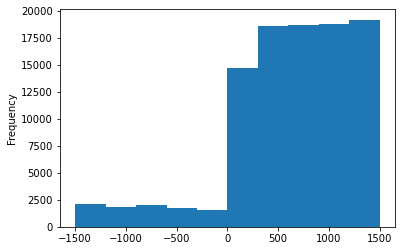

In [56]:
Customer_Final['Rate'].plot(kind= 'hist')

<AxesSubplot:ylabel='Frequency'>

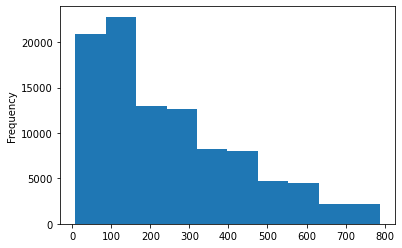

In [57]:
Customer_Final['Tax'].plot(kind= 'hist')

<AxesSubplot:ylabel='Frequency'>

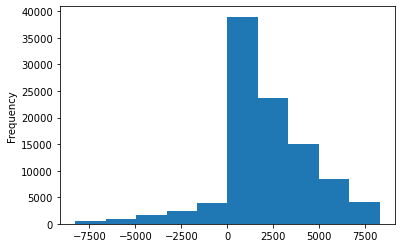

In [58]:
Customer_Final['total_amt'].plot(kind= 'hist')

<AxesSubplot:>

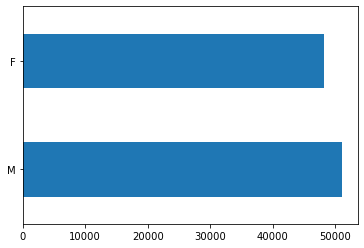

In [69]:
Customer_Final['Gender'].value_counts().plot(kind= 'barh')

<AxesSubplot:>

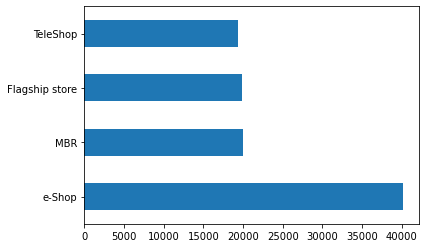

In [70]:
Customer_Final['Store_type'].value_counts().plot(kind= 'barh')

<AxesSubplot:>

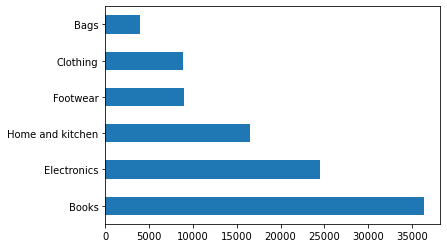

In [71]:
Customer_Final['prod_cat'].value_counts().plot(kind= 'barh')

<AxesSubplot:>

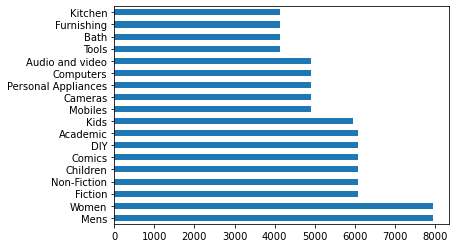

In [72]:
Customer_Final['prod_subcat'].value_counts().plot(kind= 'barh')

###### 4. Calculate the following information using the merged dataset :

 a. Time period of the available transaction data

In [85]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%d-%m-%Y')
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'],infer_datetime_format= True)

In [154]:
min_date = Customer_Final['tran_date'].min()
max_date = Customer_Final['tran_date'].max()
print(min_date,'to',max_date)

2011-01-02 00:00:00 to 2014-12-02 00:00:00


b. Count of transactions where the total amount of transaction was negative

In [92]:
Negativetransaction_count= Customer_Final.loc[Customer_Final['total_amt']<0,'transaction_id'].count()
Negativetransaction_count

9294

###### 5. Analyze which product categories are more popular among females vs male customers.

In [97]:
grp_prdfamous = Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()

In [118]:
grp_prdfamous.pivot(index='Gender',columns='prod_cat',values='Qty')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,4724,42420,10275,29160,11148,19580
M,4692,45522,11244,32380,10665,20164


Male: Books, Clothing, Electronics,Home and kitchen
|Female: Bags, Footwear  

###### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [106]:
Cust_grp= Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
Cust_grp

city_code
4.0     10571
3.0     10467
7.0     10258
5.0     10116
10.0     9976
8.0      9965
2.0      9843
1.0      9717
9.0      9214
6.0      9130
Name: customer_Id, dtype: int64

In [112]:
percentage = (Cust_grp[4.0] / Cust_grp.sum()) * 100
percentage

10.650130469387548

###### 7. Which store type sells the maximum products by value and by quantity?

In [117]:
Customer_Final.groupby('Store_type')['Qty','total_amt'].sum().sort_values(by='Qty',ascending=False)

C:\Users\kroop\AppData\Local\Temp\ipykernel_24904\1305481975.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Customer_Final.groupby('Store_type')['Qty','total_amt'].sum().sort_values(by='Qty',ascending=False)


,Qty,total_amt
Store_type,,
e-Shop,98447,8.591575e+07
MBR,48285,4.170033e+07
Flagship store,48007,4.188397e+07
TeleShop,47339,4.046656e+07


###### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [127]:
store_group = Customer_Final.pivot_table(index = 'prod_cat',columns='Store_type', values='total_amt', aggfunc='sum')
store_group.loc[['Clothing','Electronics'],'Flagship store']

prod_cat
Clothing        3583269.69
Electronics    11075680.20
Name: Flagship store, dtype: float64

###### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [131]:
gender_grp = Customer_Final.pivot_table(index = 'prod_cat',columns='Gender', values='total_amt', aggfunc='sum')
gender_grp

Gender,F,M
prod_cat,,
Bags,4.155971e+06,4.093446e+06
Books,3.698815e+07,3.987584e+07
Clothing,9.080252e+06,9.672238e+06
Electronics,2.509677e+07,2.851555e+07
Footwear,9.607659e+06,9.044016e+06
Home and kitchen,1.652871e+07,1.720430e+07


In [133]:
Earning_Male= gender_grp.loc['Electronics','M']
Earning_Male

28515547.125

###### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [136]:
positive_tran = Customer_Final.loc[Customer_Final['total_amt']>0,:]
positive_tran

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,1992-12-17,M,2.0,10440850091,271772,2013-04-26,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,1,Women
99289,271772,1992-12-17,M,2.0,10440850091,271772,2013-04-26,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,3,Kids
99290,269626,1992-12-27,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,4,Mens
99291,269626,1992-12-27,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,1,Women


In [138]:
uniqtrans = positive_tran.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
uniqtrans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Academic,1
1,266783,Books,Children,1
2,266783,Books,Comics,1
3,266783,Books,DIY,1
4,266783,Books,Fiction,1
...,...,...,...,...
63033,275265,Books,Non-Fiction,1
63034,275265,Home and kitchen,Bath,1
63035,275265,Home and kitchen,Furnishing,1
63036,275265,Home and kitchen,Kitchen,1


###### 11. For all customers aged between 25 - 35, find out:

a. What was the total amount spent for “Electronics” and “Books” product categories?

In [140]:
now = pd.Timestamp('now')
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%m%d%y')    # 1
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

In [141]:
Customer_Final['Age_categ'] = pd.cut(Customer_Final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [145]:
customer_25_35 = Customer_Final.groupby(['Age_categ','prod_cat'])['total_amt'].sum()
customer_25_35.loc['25-35',['Books','Electronics']]

Age_categ  prod_cat   
25-35      Books          1.959700e+07
           Electronics    1.472568e+07
Name: total_amt, dtype: float64

b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [149]:
customer_total_amount_25_35 = Customer_Final[Customer_Final['Age_categ']=='25-35']
customer_total_amount_25_35.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,AGE,Age_categ
26478,270831,1986-11-10,F,6.0,1330429672,270831,2013-10-12,6,5,3,1068,336.42,3540.42,Flagship store,both,Books,7,Fiction,35.0,25-35
26479,270831,1986-11-10,F,6.0,1330429672,270831,2013-10-12,6,5,3,1068,336.42,3540.42,Flagship store,both,Books,12,Academic,35.0,25-35


In [153]:
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]
total_amount['total_amt'].sum()

1815194.55